### Group Convolution (3x3 with D=1 and D=2)
Model Accuracy- 79.92% (Max)

## Importing Keras Libraries and Modules


In [0]:
from keras import backend as K
import numpy as np
import time
# Importing matplot library
import matplotlib.pyplot as plt
% matplotlib inline
# Seed the generator
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,Input
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers.merge import concatenate
from keras.layers.convolutional import Conv2D

##Importing Cifar10 dataset

In [0]:
# Importing Cifar10 dataset
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

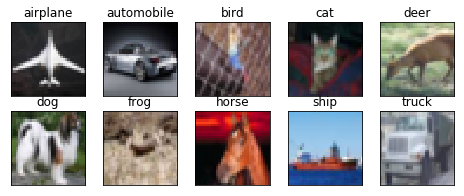

In [32]:
# Ploting each class from cifar10 dataset
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Function to plot model history
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Function to define accuracy
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [36]:
# Define the model

from keras.models import Model
visible = Input(shape=(32,32,3))

#Group-1
Conv1 = Conv2D(32, 3, 3, activation='relu',dilation_rate=1, border_mode='same')(visible)
Batch1 = BatchNormalization()(Conv1)
Dropout1 = Dropout(0.25)(Batch1)
Pool1 = MaxPooling2D(pool_size=(2, 2))(Dropout1) 
Conv1_1 = Conv2D(64, 3, 3, activation='relu',dilation_rate=1, border_mode='same')(Pool1) 
Batch1_1 = BatchNormalization()(Conv1_1)
Dropout1_1 = Dropout(0.25)(Batch1_1)
Conv1_2 = Conv2D(128, 3, 3, activation='relu',dilation_rate=1, border_mode='same')(Dropout1_1)
Batch1_2 = BatchNormalization()(Conv1_2)
Dropout1_2 = Dropout(0.25)(Batch1_2)
Pool1_1 = MaxPooling2D(pool_size=(2, 2))(Dropout1_2) 
Conv1_3 = Conv2D(256, 3, 3, activation='relu',dilation_rate=1, border_mode='same')(Dropout1_2)
Batch1_3 = BatchNormalization()(Conv1_3)
Dropout1_3 = Dropout(0.25)(Batch1_3)
Conv1_4 = Conv2D(10,1)(Dropout1_3)
flat1 = Flatten()(Conv1_4)

#Group-2
Conv2 = Conv2D(32, 3, 3, activation='relu',dilation_rate=2, border_mode='same')(visible)
Batch2 = BatchNormalization()(Conv2)
Dropout2 = Dropout(0.25)(Batch2)
Pool2 = MaxPooling2D(pool_size=(2, 2))(Dropout2) 
Conv2_1 = Conv2D(64, 3, 3, activation='relu',dilation_rate=2, border_mode='same')(Pool2) 
Batch2_1 = BatchNormalization()(Conv2_1)
Dropout2_1 = Dropout(0.25)(Batch2_1)
Conv2_2 = Conv2D(128, 3, 3, activation='relu',dilation_rate=2, border_mode='same')(Dropout2_1)
Batch2_2 = BatchNormalization()(Conv2_2)
Dropout2_2 = Dropout(0.25)(Batch2_2)
Pool2_1 = MaxPooling2D(pool_size=(2, 2))(Dropout2_2) 
Conv2_3 = Conv2D(256, 3, 3, activation='relu',dilation_rate=2, border_mode='same')(Dropout2_2)
Batch2_3 = BatchNormalization()(Conv2_3)
Dropout2_3 = Dropout(0.25)(Batch2_3)
Conv2_4 = Conv2D(10,1)(Dropout2_3)
flat2 = Flatten()(Conv2_4)



merge = concatenate([flat1, flat2])
output = Dense(10, activation='softmax')(merge)
model = Model(inputs=visible, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of model
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", dilation_rate=1, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", dilation_rate=1, padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", dilation_rate=1, padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", dilation_rate=1, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 32, 32, 32)   896         input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_108 (Conv2D)             (None, 32, 32, 32)   896         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_73 (BatchNo (None, 32, 32, 32)   128         conv2d_103[0][0]                 
__________________________________________________________________________________________________
batch_norm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 38s 98ms/step - loss: 1.7772 - acc: 0.4554 - val_loss: 1.7661 - val_acc: 0.4600
Epoch 2/50
390/390 [==============================] - 32s 81ms/step - loss: 1.1813 - acc: 0.5962 - val_loss: 1.3122 - val_acc: 0.5830
Epoch 3/50
390/390 [==============================] - 31s 81ms/step - loss: 0.9932 - acc: 0.6605 - val_loss: 1.1166 - val_acc: 0.6315
Epoch 4/50
390/390 [==============================] - 31s 80ms/step - loss: 0.8856 - acc: 0.6957 - val_loss: 1.2650 - val_acc: 0.5960
Epoch 5/50
390/390 [==============================] - 32s 81ms/step - loss: 0.7999 - acc: 0.7262 - val_loss: 1.0974 - val_acc: 0.6560
Epoch 6/50
390/390 [==============================] - 32s 81ms/step - loss: 0.7299 - acc: 0.7483 - val_loss: 1.1360 - val_acc: 0.6341
Epoch 7/50
390/390 [==============================] - 32s 81ms/step - loss: 0.6703 - acc: 0.7690 - val_loss: 1.2796 - val_acc: 0.6090
Epoch 8/50
390/390 [==============================] - 31s 80ms

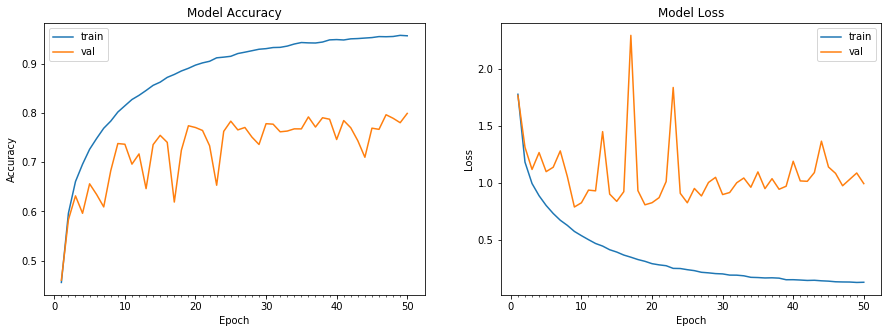

Accuracy on test data is: 79.92


In [37]:
# Image Normalization
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))